In [ ]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#read/upload the data file
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [4]:
#describes the datasets with mean/mediam,sd and others 
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [5]:
#gives the information of tabele and its datatypes and its column values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
#gives the number of null value in each column
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [7]:
#shows the no of rows and columns
train.shape

(550068, 12)

C:\anacondanavigator\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

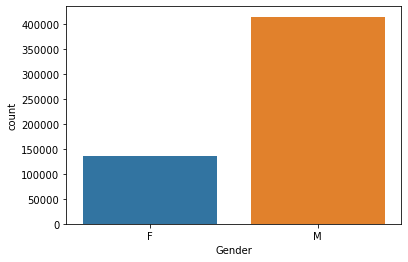

In [8]:
#sns seaborn plots the gender coloum shows male purchasing in black friday is nearly 3 times of female
sns.countplot(train['Gender'])

C:\anacondanavigator\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

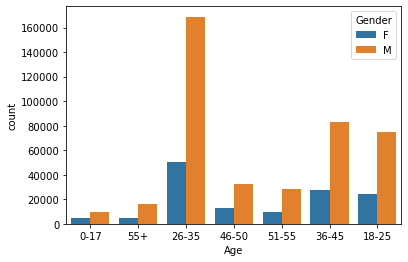

In [9]:
#countplot of gender with age and can see that age range 26-35 male are highest who purchase in blackfriday
sns.countplot(train['Age'],hue=train['Gender'])

In [10]:
#here we count the total number of people living in respective cities
train['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

<AxesSubplot:>

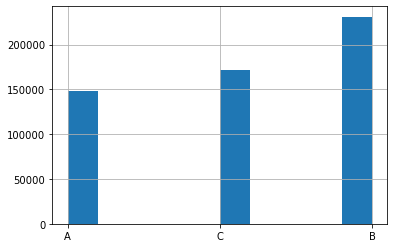

In [11]:
#we plot the histogram of people living in particular city
train['City_Category'].hist()

In [12]:
#crosstab is use to view the matching table of two, here we see the relation of cities and gender
pd.crosstab(train.City_Category,train.Gender)

Gender,F,M
City_Category,,
A,35704,112016
B,57796,173377
C,42309,128866


In [13]:
#we use crosstab to see the no. of male and female of each age group 
pd.crosstab(train.Age,train.Gender)

Gender,F,M
Age,,
0-17,5083,10019
18-25,24628,75032
26-35,50752,168835
36-45,27170,82843
46-50,13199,32502
51-55,9894,28607
55+,5083,16421


In [14]:
#as to view matching table of more then two dataframe column then we can use pivot_table with respect to its decision value
train.pivot_table(index=['Age','Gender','City_Category'],values='Purchase',aggfunc='mean')

Purchase
Age   Gender City_Category              
0-17  F      A               7826.252246
             B               8846.238339
             C               8313.388701
      M      A               9655.655424
             B               8946.030233
             C               9365.363025
18-25 F      A               8151.940820
             B               8024.474499
             C               9080.970478
      M      A               9034.719787
             B               9404.652039
             C               9881.569872
26-35 F      A               8701.506775
             B               8568.878015
             C               9056.760825
      M      A               9030.545010
             B               9326.538127
             C              10052.349437
36-45 F      A               8716.853624
             B               8755.274887
             C               9406.433724
      M      A               9089.917743
             B               9215.269979
             C              10040.668889
46-50 F      A               8735.585600
             B               8619.864616
             C               9122.771686
      M      A               8272.417964
             B               9535.179831
             C               9720.595405
51-55 F      A               8710.023622
             B               8876.350695
             C               9377.025303
      M      A               9837.063180
             B               9486.942732
             C               9925.189470
55+   F      A               9240.678571
             B               9010.011103
             C               8980.591746
      M      A               8400.335307
             B              10084.874049
             C               9530.313690

In [15]:
#here we view max value from pivot_table and view that male with age +55 and lives in city b has purchase
#items with maximum amount
pivot=train.pivot_table(index=['Age','Gender','City_Category'],values='Purchase',aggfunc='mean')
max_value=pivot.max()
max_value

Purchase    10084.874049
dtype: float64

In [16]:
#we can use pivot_table for many column also.
train.pivot_table(index=['Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3'],
                  values='Purchase',aggfunc='mean')

Purchase
Marital_Status Product_Category_1 Product_Category_2 Product_Category_3              
0              1                  2.0                3.0                 14058.183463
                                                     4.0                  8184.665663
                                                     5.0                 13908.148268
                                                     6.0                 12532.970419
                                                     8.0                 14885.474153
...                                                                               ...
1              11                 15.0               16.0                 4038.562674
               12                 14.0               17.0                 1290.205479
               13                 14.0               16.0                  673.302752
                                  15.0               16.0                  676.231579
               15                 16.0               17.0                14935.447761

[273 rows x 1 columns]

C:\anacondanavigator\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

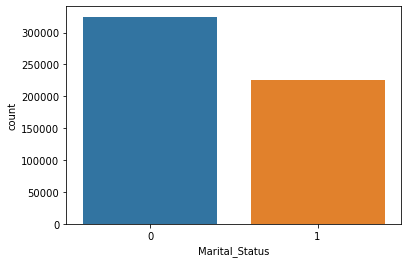

In [17]:
#we countplot the maritial status column with seaborn and view more no of married people are involve
sns.countplot(train['Marital_Status'])

In [18]:
#we can use nunique to find the total no of unique identification
train['User_ID'].nunique()

5891

In [19]:
#we count the value of people staying in the current city years 
train['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

<AxesSubplot:>

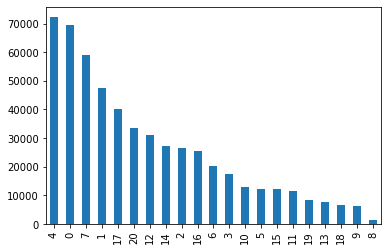

In [20]:
#value count of occupation with bar graph
train.Occupation.value_counts().plot(kind='bar')

In [21]:
#count the total unique no of products
train['Product_ID'].nunique()

3631

In [22]:
#here we define and unique function of numpy so we can use below to view unique id od columns
def unique(column):
    x=np.array(column)
    print(np.unique(x)) 

In [23]:
#we use the above unique function which shows the unique id of occupation where each no defines the occupation type.
print('the unique id of occupation is')
unique(train['Occupation'])

the unique id of occupation is
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


In [24]:
#here unique function is use to view the unique id of age column
print('the unique id of Age')
unique(train['Age'])

the unique id of Age
['0-17' '18-25' '26-35' '36-45' '46-50' '51-55' '55+']


In [25]:
#use can use  list the range of occupation and calculate the sum of spend money by each occupation field

occupation_id=list(range(0,21))
spend_money=[]
for oid in occupation_id:
    spend_money.append(train[train['Occupation']==oid]['Purchase'].sum())
spend_money

[635406958,
 424614144,
 238028583,
 162002168,
 666244484,
 113649759,
 188416784,
 557371587,
 14737388,
 54340046,
 115844465,
 106751618,
 305449446,
 71919481,
 259454692,
 118960211,
 238346955,
 393281453,
 60721461,
 73700617,
 296570442]

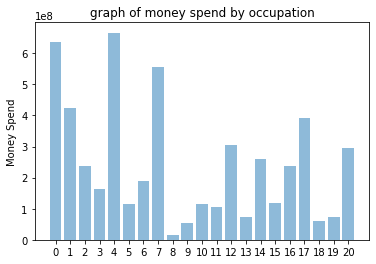

In [26]:
# here we just divide the occupation in list and plot a graph for showing the money spend by each occupation field
objects=list(range(0,21))

y_pos=np.arange(len(objects))

plt.bar(y_pos,spend_money,align='center',alpha=0.5)

plt.xticks(y_pos,objects)

plt.ylabel('Money Spend')

plt.title('graph of money spend by occupation')

plt.show()

In [27]:
#we can view the list of columns head
print(train.columns)

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')


In [28]:
#we can also use groupby to calculate the sum of each field, this is for age
train.groupby(by='Age')['Purchase'].sum()

Age
0-17      134913183
18-25     913848675
26-35    2031770578
36-45    1026569884
46-50     420843403
51-55     367099644
55+       200767375
Name: Purchase, dtype: int64

<AxesSubplot:xlabel='Age'>

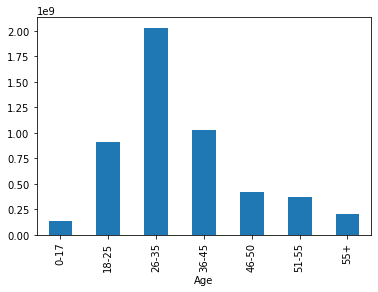

In [29]:
#we plot the age groupby field
train.groupby(by='Age')['Purchase'].sum().plot(kind='bar')

In [30]:
#groupby for occupation
occupation_buys = train.groupby(by='Occupation')['Purchase'].sum()
occupation_buys

Occupation
0     635406958
1     424614144
2     238028583
3     162002168
4     666244484
5     113649759
6     188416784
7     557371587
8      14737388
9      54340046
10    115844465
11    106751618
12    305449446
13     71919481
14    259454692
15    118960211
16    238346955
17    393281453
18     60721461
19     73700617
20    296570442
Name: Purchase, dtype: int64

<AxesSubplot:xlabel='Occupation'>

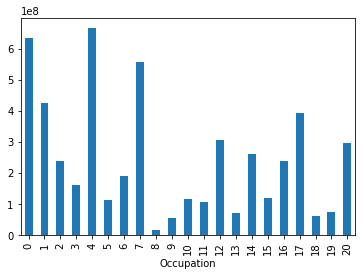

In [31]:
#occupation plot
occupation_buys.plot(kind='bar')

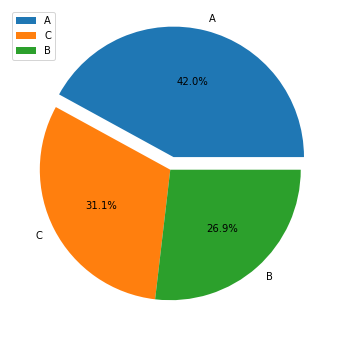

In [32]:
#we use piechart to divide the citycategory withe resp. fields where first field is exploded 
explode=(0.1,0,0)
fig1,ax1=plt.subplots(figsize=(11,6))
ax1.pie(train['City_Category'].value_counts(),explode=explode,labels=train['City_Category'].unique(),autopct='%1.1f%%')
plt.legend()
plt.show()

In [33]:
#information of table
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [34]:
#as 70% of data are missing in product_category_3 so we drop that coluzmn
train=train.drop('Product_Category_3',axis=1)

In [35]:
#we just fill the product_category_2 table with mean value of that table so there won't be null value
train.Product_Category_2=train.Product_Category_2.fillna(train.Product_Category_2.mean())

In [36]:
#viewing the table
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 46.2+ MB


In [37]:
#no. of rows and column 
train.shape

(550068, 11)

In [38]:
#as product_id and user_id are independent variable so we can drop this column 
train=train.drop(['User_ID','Product_ID'],axis=1)
train

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,0-17,10,A,2,0,3,9.842329,8370
1,F,0-17,10,A,2,0,1,6.000000,15200
2,F,0-17,10,A,2,0,12,9.842329,1422
3,F,0-17,10,A,2,0,12,14.000000,1057
4,M,55+,16,C,4+,0,8,9.842329,7969
...,...,...,...,...,...,...,...,...,...
550063,M,51-55,13,B,1,1,20,9.842329,368
550064,F,26-35,1,C,3,0,20,9.842329,371
550065,F,26-35,15,B,4+,1,20,9.842329,137
550066,F,55+,1,C,2,0,20,9.842329,365


In [39]:
#viewing if column is droped or not
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  object 
 1   Age                         550068 non-null  object 
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Purchase                    550068 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 37.8+ MB


In [40]:
#test data head
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [41]:
#test dataset info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [42]:
#droping test product_category_3
test=test.drop('Product_Category_3',axis=1)

In [43]:
#inserting mean value in product_category 2
test.Product_Category_2=test.Product_Category_2.fillna(test.Product_Category_2.mean())

In [44]:
test=test.drop(['User_ID','Product_ID'],axis=1)

In [45]:
#test information after droping and inserting value in dataframe
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      233599 non-null  object 
 1   Age                         233599 non-null  object 
 2   Occupation                  233599 non-null  int64  
 3   City_Category               233599 non-null  object 
 4   Stay_In_Current_City_Years  233599 non-null  object 
 5   Marital_Status              233599 non-null  int64  
 6   Product_Category_1          233599 non-null  int64  
 7   Product_Category_2          233599 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 14.3+ MB


In [46]:
#preprocessing the data 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [47]:
#seperating categorical and numerical data
categorical_col=['City_Category','Gender']
numerical_col=['Age','Occupation','Stay_In_Current_City_Years','Product_Category_1','Product_Category_2']

In [48]:
#scaling/ assining self value in age train dataset
train['Age']=train['Age'].replace('0-17',17)
train['Age']=train['Age'].replace('18-25',25)
train['Age']=train['Age'].replace('26-35',35)
train['Age']=train['Age'].replace('36-45',45)
train['Age']=train['Age'].replace('46-50',50)
train['Age']=train['Age'].replace('51-55',55)
train['Age']=train['Age'].replace('55+',60)


In [49]:
#scaling/ assining self value in age test dataset
test['Age']=test['Age'].replace('0-17',17)
test['Age']=test['Age'].replace('18-25',25)
test['Age']=test['Age'].replace('26-35',35)
test['Age']=test['Age'].replace('36-45',45)
test['Age']=test['Age'].replace('46-50',50)
test['Age']=test['Age'].replace('51-55',55)
test['Age']=test['Age'].replace('55+',60)

In [50]:
#scaling/ assining self value in saty_in_current_city_years 4+ train and test dataset
train['Stay_In_Current_City_Years']=train['Stay_In_Current_City_Years'].replace('4+',4)
test['Stay_In_Current_City_Years']=test['Stay_In_Current_City_Years'].replace('4+',4)

In [51]:
#encoding the categorical column
encoder=LabelEncoder()

for col in categorical_col:
    train[col]=encoder.fit_transform(train[col])
    test[col]=encoder.fit_transform(test[col])


In [52]:
#scaling the numerical_col
scaler=StandardScaler()

for col in numerical_col:
    train[col]=scaler.fit_transform(train[col].values.reshape(-1,1))
    test[col]=scaler.fit_transform(test[col].values.reshape(-1,1))

In [53]:
train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,0,-2.059570,0.294864,0,0.109801,0,-0.610809,4.221533e-16,8370
1,0,-2.059570,0.294864,0,0.109801,0,-1.118912,-9.131340e-01,15200
2,0,-2.059570,0.294864,0,0.109801,0,1.675656,4.221533e-16,1422
3,0,-2.059570,0.294864,0,0.109801,0,1.675656,9.880753e-01,1057
4,1,2.094842,1.214734,2,1.660861,0,0.659449,4.221533e-16,7969


In [54]:
#spliting training and testing datasets 
x=train.drop(['Purchase'],axis=1)
y=train['Purchase']
x_test=test
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.20,random_state=42)


In [55]:

#Implementing regression module libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [56]:
#for linear regression
lr=LinearRegression()
model1=lr.fit(x_train,y_train)#fitting data to linear regression
predict1=model1.predict(x_val)
predict1

array([12452.3559456 , 10445.49506327,  7110.93558946, ...,
        8113.80908142,  6625.05844739,  9615.62204145])

In [57]:
#for decision tree regression
dtr=DecisionTreeRegressor()
model2=dtr.fit(x_train,y_train)#fitting data for decision tree regression
predict2=model2.predict(x_val)
predict2

array([13889.5       , 11899.        ,  5706.71428571, ...,
        6966.64285714,  3176.5       ,  9653.08571429])

In [58]:
#for randomn forest regression
rfr=RandomForestRegressor()
model3=rfr.fit(x_train,y_train)#fitting data for random forest regression
predict3=model3.predict(x_val)
predict3

array([13892.89350216, 13093.6606232 ,  7550.05038456, ...,
        7159.72103254,  3662.42415657,  9629.9372476 ])

In [59]:
# for gradient boosting regressor
gbr=GradientBoostingRegressor()
model4=gbr.fit(x_train,y_train)#fitting model for gradient boosting regressor
predict4=model4.predict(x_val)
predict4

array([14350.74249398, 13447.40041456,  7342.09869554, ...,
        7118.29841985,  4726.44893148,  9859.67227219])

In [60]:
#checking the accuracy of predicted model
from xgboost.sklearn import XGBRegressor 
xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

model5=xgb_reg.fit(x_train, y_train)
predict5=model5.predict(x_val)
predict5

array([15882.44  , 13884.52  ,  7419.8594, ...,  6648.9263,  5553.2964,
        9664.072 ], dtype=float32)

In [61]:
rmse1=np.sqrt(mean_squared_error(predict1,y_val))#root mean square error of linear regression
rmse2=np.sqrt(mean_squared_error(predict2,y_val))#root mean square error of decision tree
rmse3=np.sqrt(mean_squared_error(predict3,y_val))#root mean square error of random forest
rmse4=np.sqrt(mean_squared_error(predict4,y_val))#root mean square error of Gradient boosting
rmse5=np.sqrt(mean_squared_error(predict5,y_val))#root mean square error of XGB boosting

In [62]:
print('the root mean square error of linear regression is: ',rmse1)
print('the root mean square error of decision tree regression is: ',rmse2)
print('the root mean square error of random froest regression is: ',rmse3)
print('the root mean square error of gradient boosting regression is: ',rmse4)
print('the root mean square error of XG boosting regression is: ',rmse5)
#we choose xg boosting regression over other as it has less root mean square error
# we can also use random forest,decision tree or gradienr boosting as there is not so many diffrence

the root mean square error of linear regression is:  4683.668492415711
the root mean square error of decision tree regression is:  3161.556878592136
the root mean square error of random froest regression is:  3028.04621287175
the root mean square error of gradient boosting regression is:  3013.5851367762193
the root mean square error of XG boosting regression is:  2932.3511991042824


In [63]:
print("Accuracy Score of Linear regression on train set",model1.score(x_train,y_train)*100)
print("Accuracy Score of decision tree regression on train set",model2.score(x_train,y_train)*100)
print("Accuracy Score of random forest regression on train set",model3.score(x_train,y_train)*100)
print("Accuracy Score of Gradient boosting regression on train set",model4.score(x_train,y_train)*100)
print("Accuracy score of XG boost regression on train set",model5.score(x_train,y_train)*100)
# as, having similar rmse value i chek for the accuracy score of regression model whish shows
#decision tree and random forest has maximum accuracy with minimum rmse i.e similar to gradient boost
# so we can choose random forest or decision tree

Accuracy Score of Linear regression on train set 12.769267980075561
Accuracy Score of decision tree regression on train set 74.83735889827598
Accuracy Score of random forest regression on train set 74.33714033262018
Accuracy Score of Gradient boosting regression on train set 64.58702932265004
Accuracy score of XG boost regression on train set 67.75859003193287
